In [1]:
from __future__ import print_function
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
from statistics import variance
"""
Loads financial data as a pandas dataframe
"""
def load_dataframe(filename) :
    return pd.read_csv(filename,index_col=0)

"""
Loads financial data as a tuple: names,data.  
names is a list of the stock names represented in each column.
data is a 2d numpy array.  Each row of data corresponds to a trading day.
data[i,j] is the price (technically the adjusted closing price) of 
instrument names[j] on the ith day.  The days are ordered chronologically.
"""
def load_data(filename) :
    df = pd.read_csv(filename,index_col=0)
    names = df.columns.values.tolist()
    data = df.to_numpy()
    #data = df.as_matrix()
    return names,data

"""
Given a 1d numpy array vec of n values, and a list of n names,
prints the values and their associated names.
"""
def pretty_print(vec,names) :
    print(pd.DataFrame(vec,names,['']).transpose())

"""
Given a 1d numpy array vec of n values, and a list of n names,
prints the values and their associated names in a LaTeX friendly
format.
"""
def pretty_print_latex(vec,names,num_col=6) :
    print("\\begin{center}")
    print("\\begin{tabular}{c"+("|c"*(num_col-1))+"}")
    for i in range(0,len(names),num_col) :
        start = True
        for j in range(i,min(i+num_col,len(names))) :
            if not start :
                print(" & ",end='')
            start = False
            print(names[j],end='')
        print("\\\\")
        start = True
        for j in range(i,min(i+num_col,len(names))) :
            if not start :
                print(" & ",end='')
            start = False
            print("%.04f"%vec[j],end='')
        print("\\\\")
        if i+num_col < len(names) :
            print("\\hline")
    print("\\end{tabular}")
    print("\\end{center}")

def main() :
    names,data = load_data('stockprices.csv')
    print("# of stocks = %d, # of days = %d"%(data.shape[1],data.shape[0]))
    # center the data
    for i in range(0,18):
        data[:,i] = data[:,i] - data[:,i].mean()
    #pretty_print(data[0,:],names)

    ### Part (a)
    pca = PCA(n_components=2)
    pca.fit(data)

    c1 = pca.components_[0]
    #print("component 1:")
    #pretty_print(c1, names)
    c2 = pca.components_[1]
    #print("component 2:")
    #pretty_print(c2, names)

    v_a = variance(data[:,1])
    #print("variance of Amazon is:", v_a)
    v_g = variance(data[:,3])
    #print("variance of Google is:", v_g)

    # calculating variance for each stock
    v1 = np.zeros((18))
    for i in range(0,18):
        v1[i] = variance(data[:,i])
    #print("variance of each stock:")
    #pretty_print(v1,names)


    ### Part (b)
    # scaling data
    scaler = preprocessing.StandardScaler().fit(data)
    data_scaled = scaler.transform(data)

    # scaled PCA
    pca = PCA(n_components=2)
    pca.fit(data_scaled)

    c1 = pca.components_[0]
    #print("component 1:")
    #pretty_print(c1, names)
    c2 = pca.components_[1]
    #print("component 2:")
    #pretty_print(c2, names)

    ### Part (c)
    # calculate the variance of daily returns
    R = np.diff(data.T)
    R = R.T
    print(R)

    A = 100*np.ones((18))
    A[0:4] = 200
    print(A)
    sig = np.cov(R.T)
    var = np.dot(A.T, np.dot(sig, A))
    print(np.sqrt(var))

    ### Part (d)
    # calculating the mean of y = Ax
    m = np.zeros((18))
    for i in range(0,18):
        m[i] = R[:,i].mean()
    #print("mean of daily returns:")
    pretty_print(m,names)
    
    print(np.dot(A,m))
    print(R[:,0].mean())


if __name__ == "__main__": 
    main()


#pretty_print_latex(data[0,:],names)

FileNotFoundError: [Errno 2] No such file or directory: 'stockprices.csv'

Model 1 relative error: 0.06719076275920381
Model 2 relative error: 0.06657839233767923


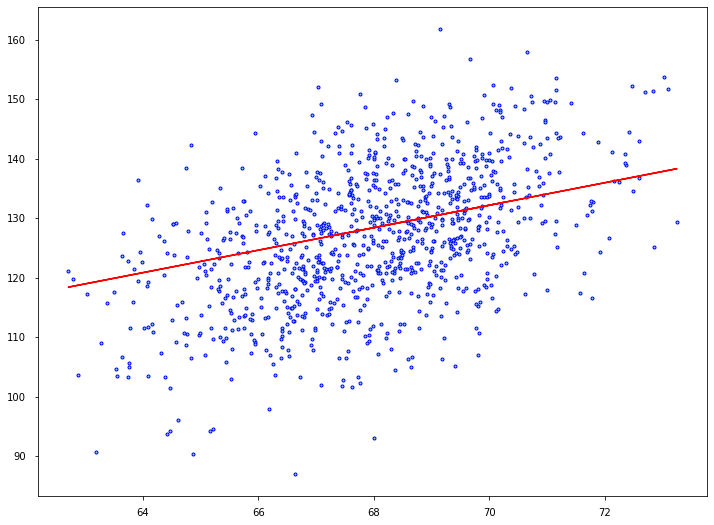

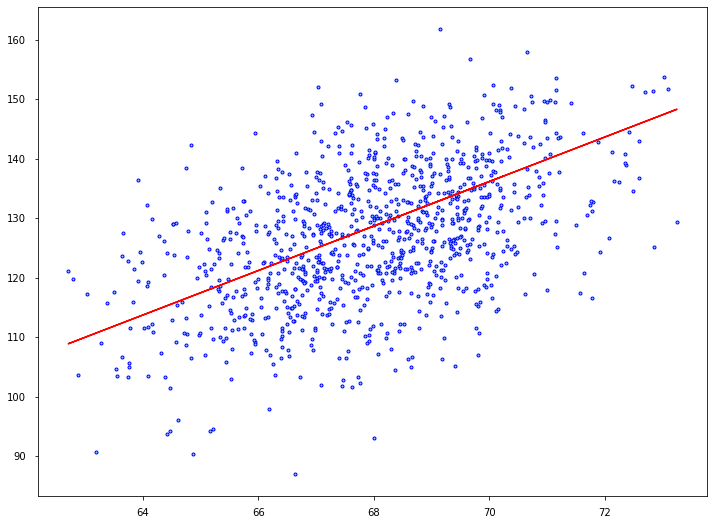

In [1]:
"""
"""
import os.path
import math
import matplotlib.pyplot as plt
import numpy as np
import random

plt.close("all")
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

### CHANGE PATH TO WHEREVER YOU SAVE THE DATA FILES ### 
data = np.loadtxt("heights_weights.txt") 

#n_train = 20000
n_train = 100
n_test = 1000

# Randomly select training, test and validation sets
np.random.shuffle(data)
data_train = data[range(n_train),:]
data_test = data[range(n_train, n_train+n_test),:]
heights_train = data_train[:,1]
weights_train = data_train[:,2]
heights_test = data_test[:,1]
weights_test = data_test[:,2]

### INSERT CODE HERE ###
# Hint: To fit model 1 use the expression you found directly
# to fit model 2 you can use np.linalg.lstsq
x0 = 1/np.dot(heights_train.T, heights_train)
x = np.dot(np.dot(x0,heights_train.T), weights_train)
pred_model_1 = np.dot(x,heights_test)
A = np.vstack([heights_train, np.ones(len(heights_train))]).T
y1, y0 = np.linalg.lstsq(A, weights_train, rcond=None)[0]
pred_model_2 = np.dot(y1, heights_test) + y0

plt.figure(figsize=(12, 9))  
plt.plot(heights_test, weights_test, '.',  color='skyblue',markeredgecolor='blue')
plt.plot(heights_test, pred_model_1,  c="red")

plt.figure(figsize=(12, 9))  
plt.plot(heights_test, weights_test, '.', color='skyblue',markeredgecolor='blue')
plt.plot(heights_test, pred_model_2, c="red")

error_1 = np.sum(np.abs((pred_model_1 - weights_test)/weights_test))/n_test
error_2 = np.sum(np.abs((pred_model_2 - weights_test)/weights_test))/n_test

print ("Model 1 relative error: " + str(error_1))
print ("Model 2 relative error: " + str(error_2))

plt.show()